Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [143]:
library(ggplot2) 
library(dplyr)
library(package = "lattice")
library(caret)
options(repr.plot.height=4,repr.plot.width=6)

In [144]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [145]:
airbnb2 <- subset(airbnb, select = c(City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude))

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [146]:
head(airbnb2, 5)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155


In [147]:
df_madrid <-filter(airbnb2, Room.Type == "Entire home/apt" )
df_madrid <- df_madrid[!(df_madrid$Neighbourhood == ""),]

In [148]:
borrar <- c("Room.Type",'City')
df_madrid <- df_madrid[ , !(names(df_madrid) %in% borrar)]


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [149]:
head(df_madrid, 5)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
8,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
9,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019


In [150]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [151]:
numeroDeNa<-sum(is.na(df_madrid$Square.Meters))
filasTotales<-nrow(df_madrid)
porcentajeNa <- numeroDeNa/filasTotales

print(paste("El porcentaje de apartamentos con NA's es: ", porcentajeNa))

[1] "El porcentaje de apartamentos con NA's es:  0.938205002452182"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [152]:
aptSinNa<- filasTotales- numeroDeNa
aptCeros<- filter(df_madrid, df_madrid$Square.Meters == 0)
aptCerosTotal<-length(aptCeros$Square.Meters)
porcentajeAptCero<- aptCerosTotal/ aptSinNa

print(paste("El porcentaje de apartamentos con 0 metros cuadrados es: ", porcentajeAptCero))

[1] "El porcentaje de apartamentos con 0 metros cuadrados es:  0.362433862433862"


Reemplazar todos los 0m^2 por NA 

In [153]:
df_madrid$Square.Meters[df_madrid$Square.Meters==0]<-NA
table(is.na(df_madrid$Square.Meters))


FALSE  TRUE 
  241  5876 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

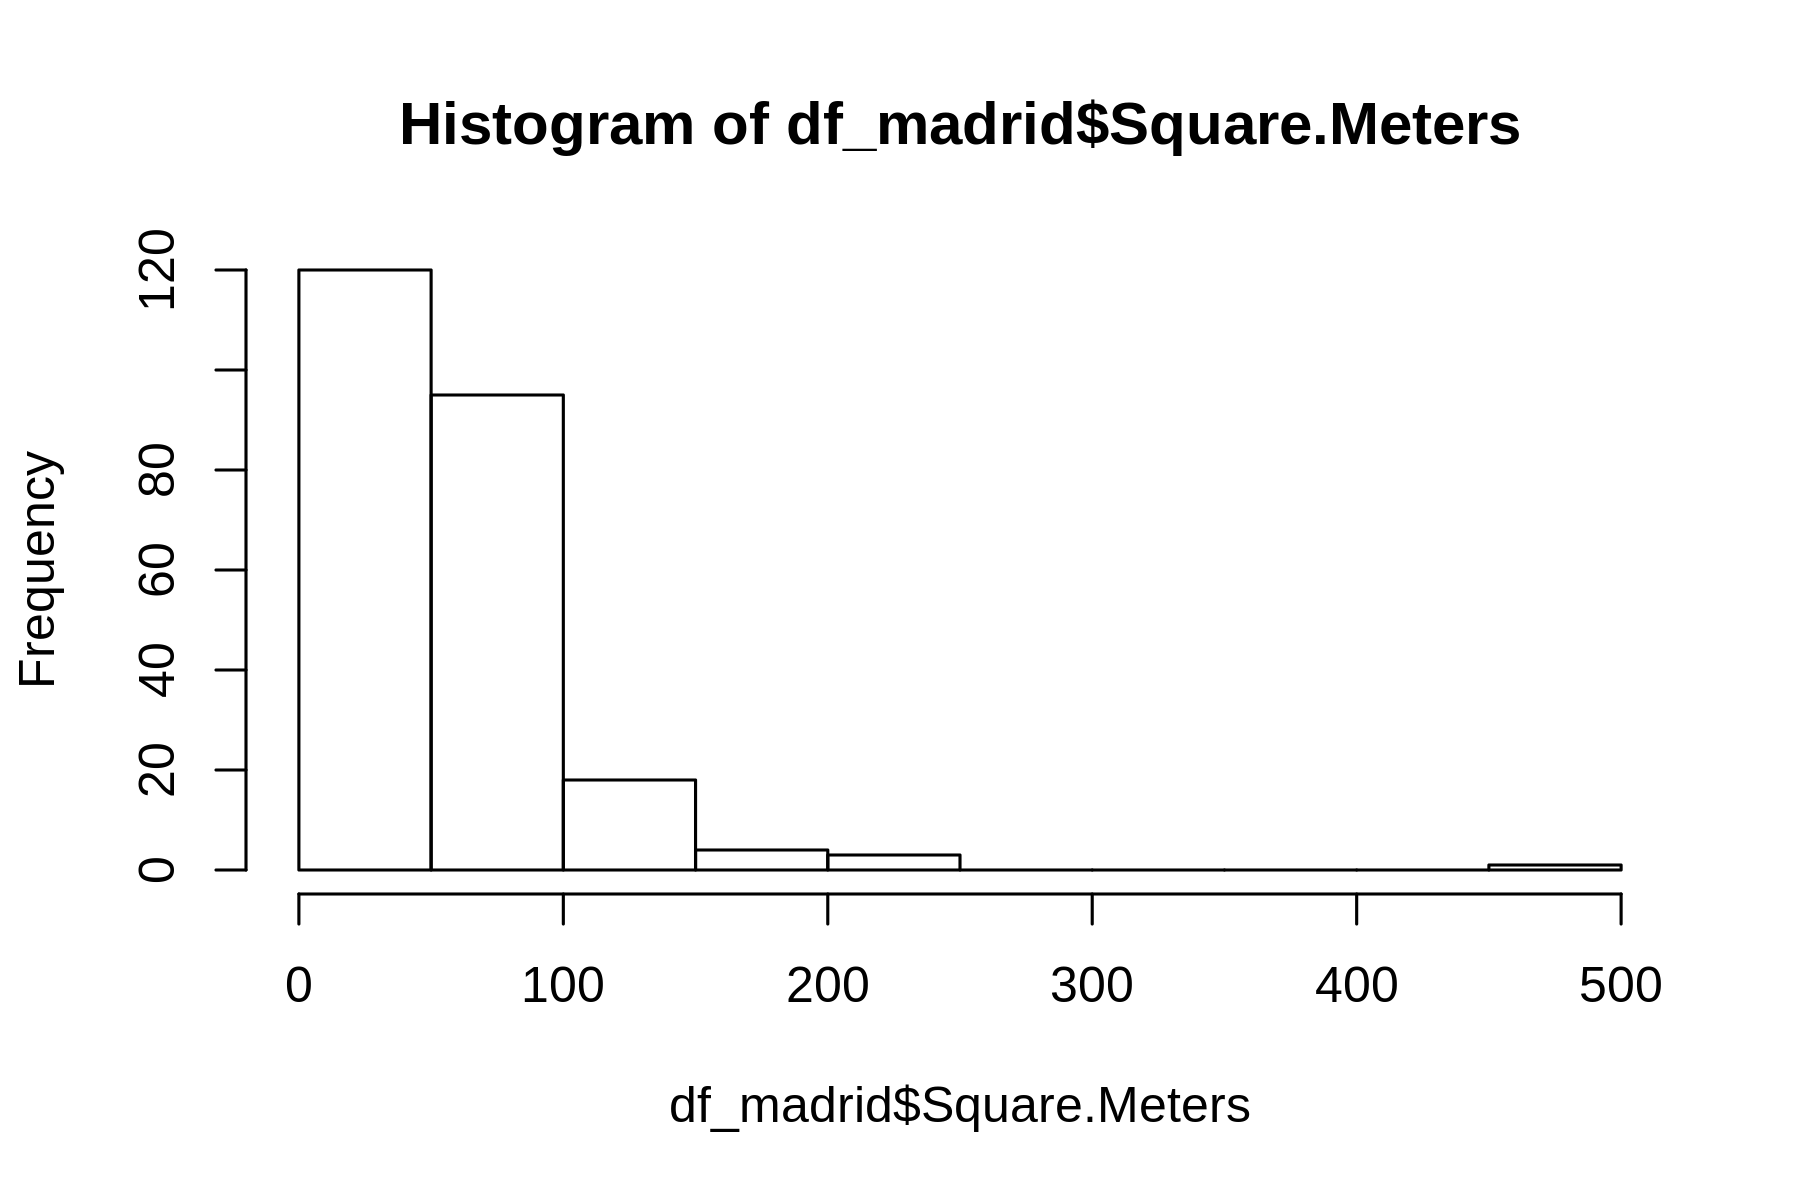

In [154]:
hist(x = df_madrid$Square.Meters, )

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [155]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20]<-NA
df_madrid<-df_madrid%>% select(-Square.Feet)



Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [156]:

df_Na<- aggregate(Square.Meters ~ Neighbourhood, data = df_madrid, FUN = mean, na.rm=FALSE)
df_madrid<-filter(df_madrid, Neighbourhood %in% df_Na$Neighbourhood)


length(df_madrid$Square.Meters)

[1] 4979

In [157]:

index_borrar<-which(c(df_madrid$Square.Meters> 150))
df_madrid<-df_madrid[-c(index_borrar),]
length(df_madrid$Square.Meters)


[1] 4971

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“número de items para para sustituir no es un múltiplo de la longitud del reemplazo”

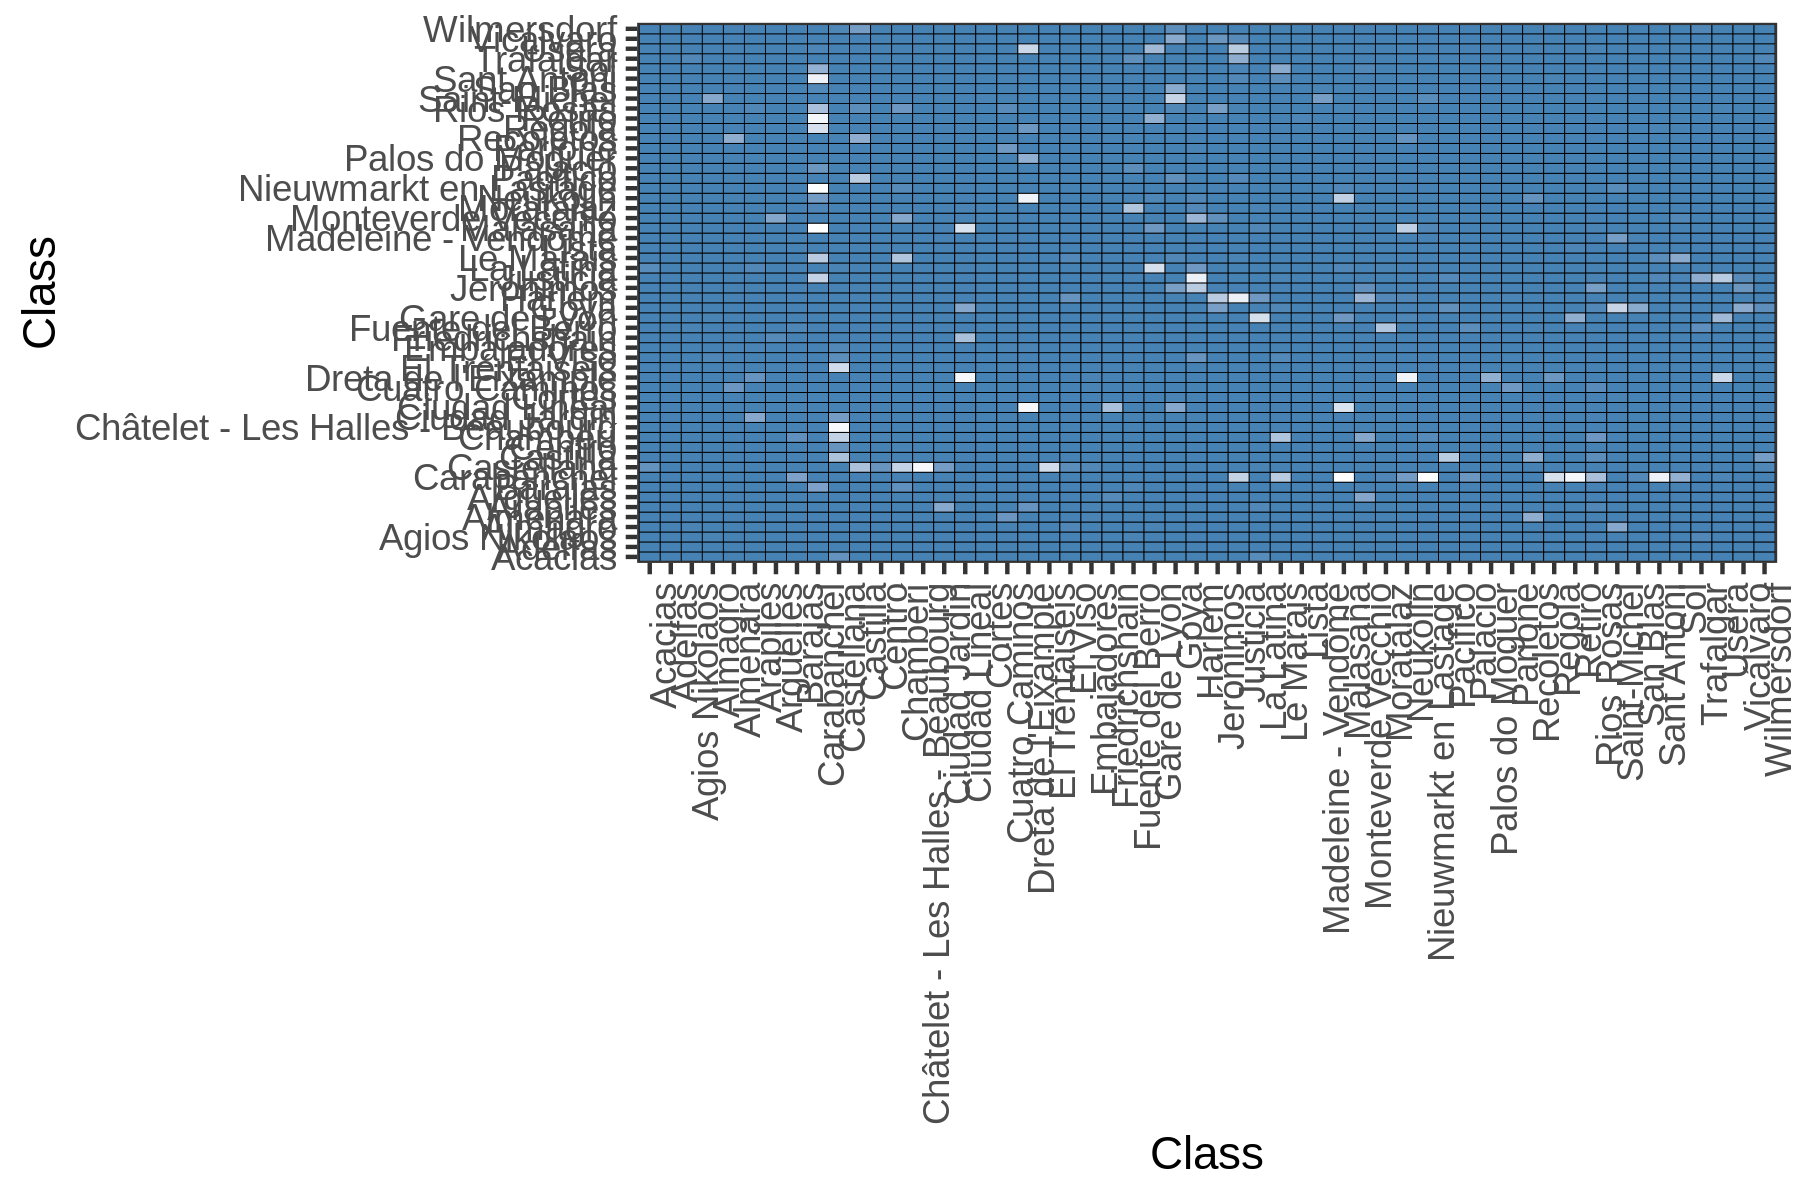

In [158]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [159]:

df_metros.dist<- as.dist(1-abs(resm))
str(df_metros.dist)
resm<-factor(resm)

 'dist' num [1:1431] 0 0 0 0 0 0 0 0 0.141 0 ...
 - attr(*, "Labels")= chr [1:54] "Acacias" "Adelfas" "Agios Nikolaos" "Almagro" ...
 - attr(*, "Size")= int 54
 - attr(*, "call")= language as.dist.default(m = 1 - abs(resm))
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE


Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [160]:

df_metros.tree <- hclust(df_metros.dist, method="complete")
df_metros.dend <- as.dendrogram(df_metros.tree) 


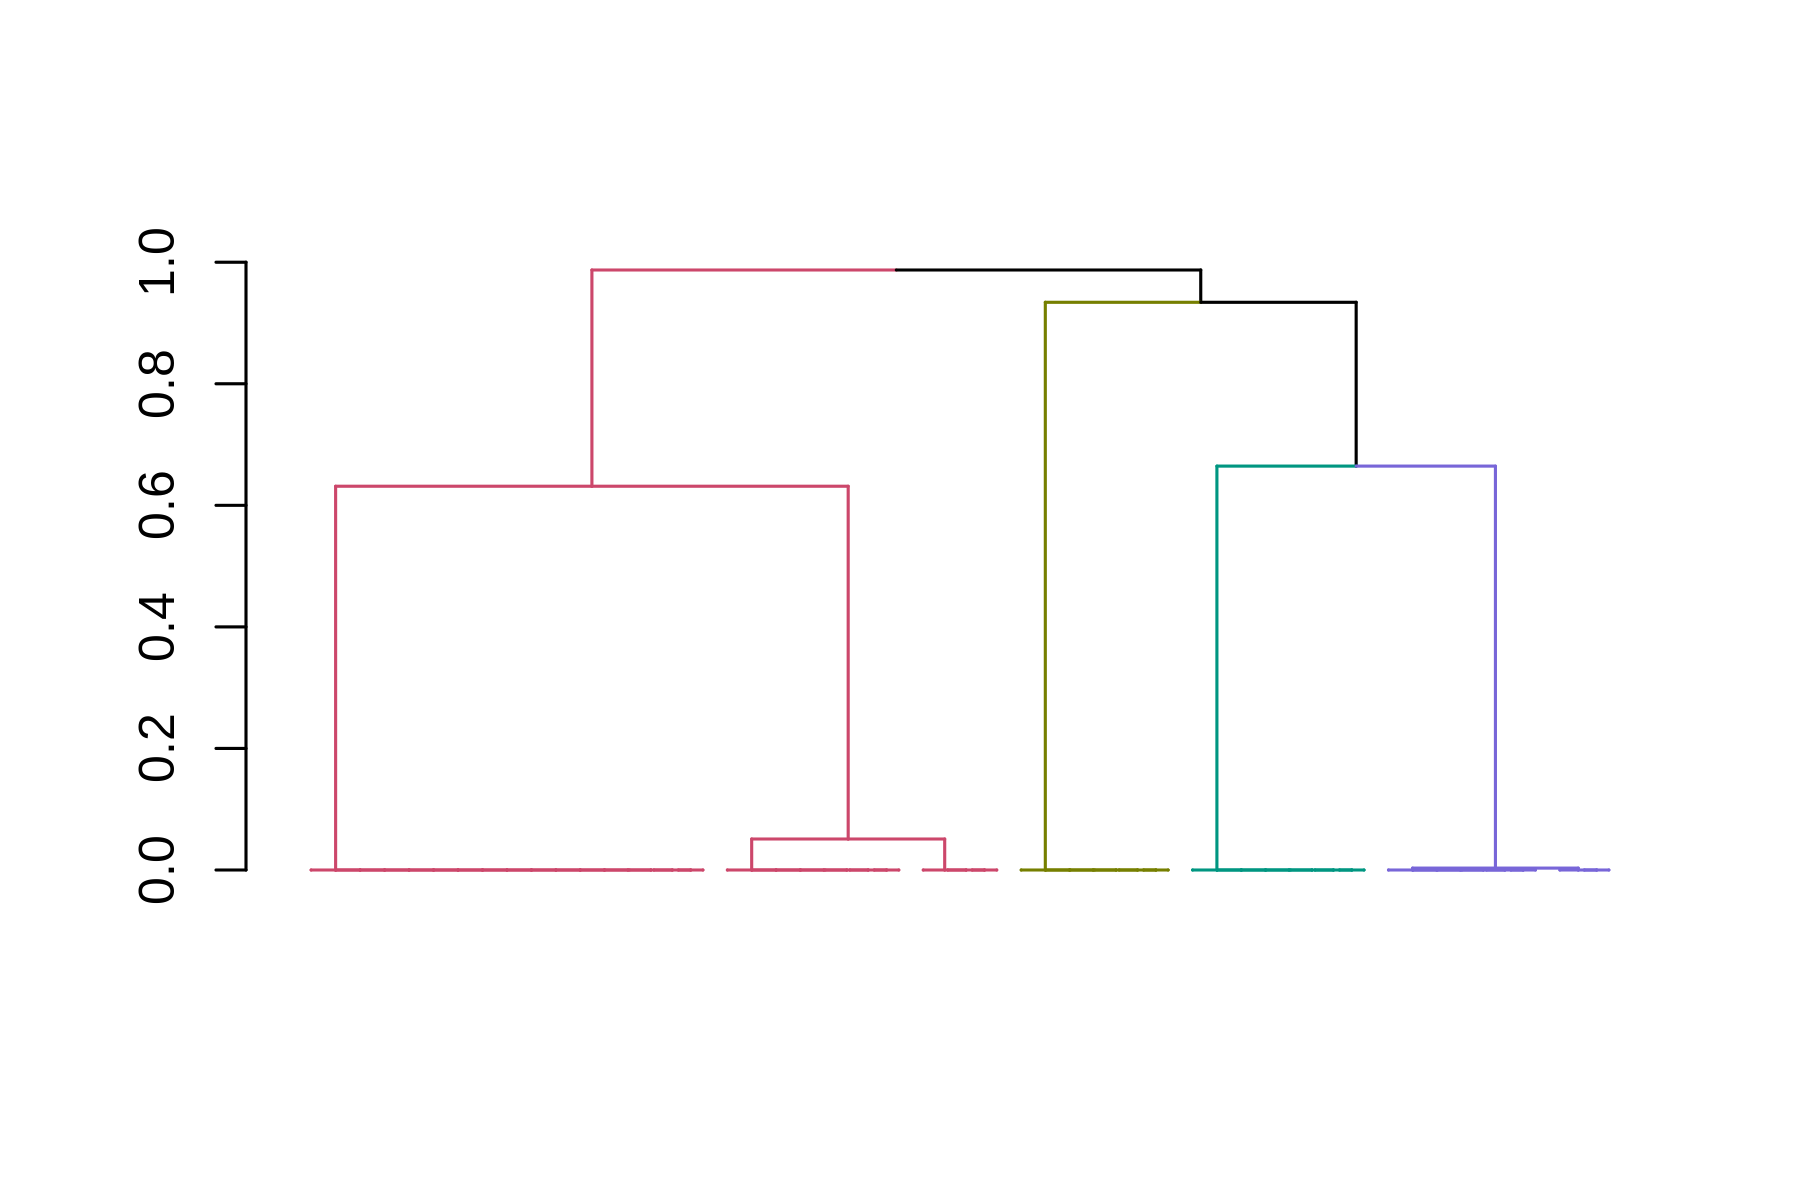

In [161]:
library(cluster)
library(dendextend)

clusters <- cutree(df_metros.dend, k=4)
plot(color_branches(df_metros.dend, k=4),leaflab="none")

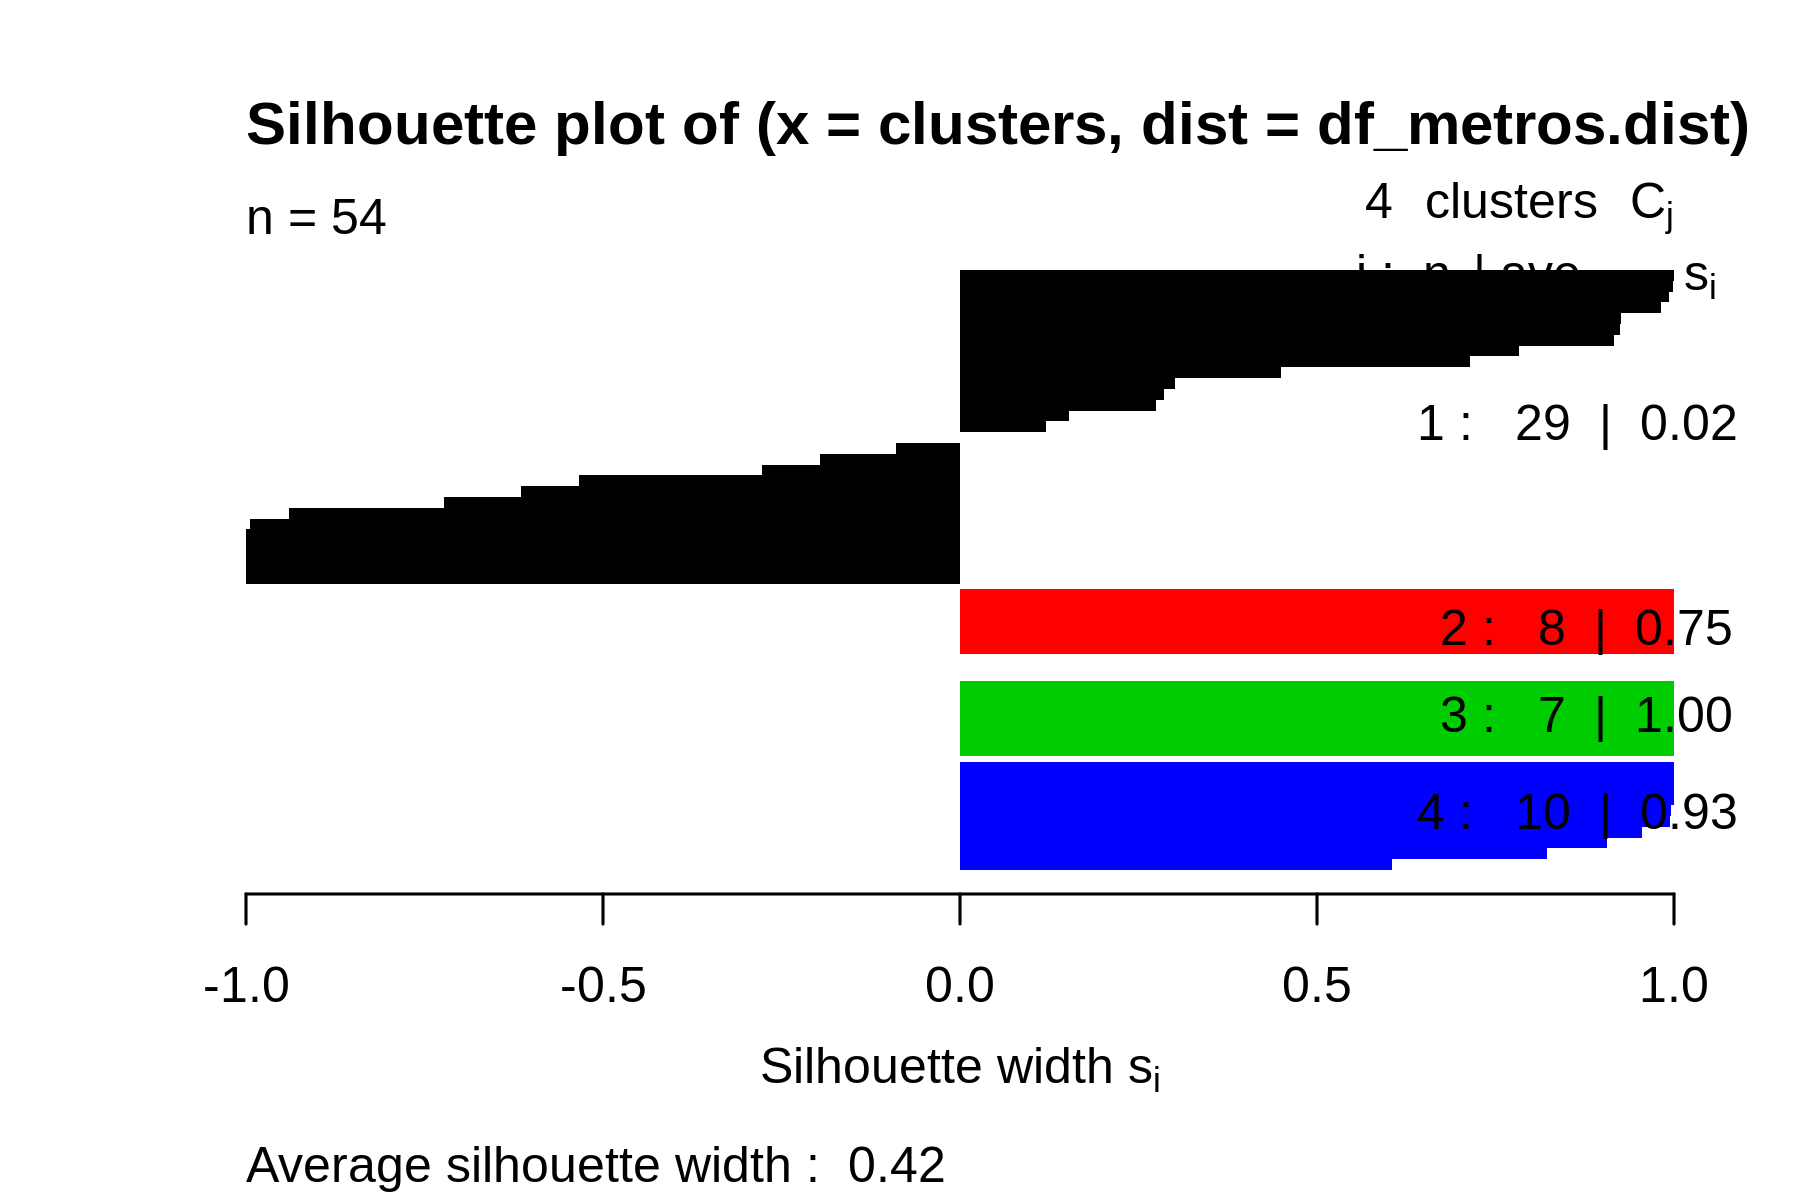

In [162]:

ss<-silhouette(clusters, df_metros.dist)
plot(ss,col=1:max(clusters), border = NA)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [163]:
#El punto de corte en 0.4 podria ser aconsejable. En total aparecen 4 clusters 

In [164]:
cluster <- data.frame(clusters)
cluster_var<-c()
for (i in df_madrid$Neighbourhood){
    if (i %in% df_Na$Neighbourhood){
        cluster_var<-c(cluster_var, cluster[i,])
    }
    }
df_madrid$neighb_id<-c(cluster_var)


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [165]:
train<-round(length(df_madrid$Neighbourhood) * 0.30)
indx<- 1:train

df_madrid.test<-df_madrid[indx,]
df_madrid.train<-df_madrid[-indx,]


length(df_madrid.test$Neighbourhood)


[1] 1491

In [166]:
modelo_metros.train<-glm(Square.Meters ~ Bathrooms + Bedrooms + Beds + Price + Accommodates
            + Guests.Included, data=df_madrid.train)
summary(modelo_metros.train)



Call:
glm(formula = Square.Meters ~ Bathrooms + Bedrooms + Beds + Price + 
    Accommodates + Guests.Included, data = df_madrid.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-39.989  -10.633   -2.459    8.694   55.895  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     15.32967    4.36042   3.516 0.000625 ***
Bathrooms       17.21907    4.17635   4.123 7.02e-05 ***
Bedrooms        12.43847    2.81675   4.416 2.26e-05 ***
Beds             0.26631    1.86997   0.142 0.886998    
Price            0.02801    0.02353   1.191 0.236199    
Accommodates     2.83495    1.62285   1.747 0.083279 .  
Guests.Included -3.68487    1.78024  -2.070 0.040666 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 274.018)

    Null deviance: 82739  on 123  degrees of freedom
Residual deviance: 32060  on 117  degrees of freedom
  (3356 observations deleted due to missi

In [167]:
predict_train_meters<-predict(modelo_metros.train, df_madrid.test)


In [168]:
postResample( df_madrid.test$Square.Meters, predict_train_meters)


RMSE  Rsquared       MAE 
       NA 0.6248264        NA

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Warning message in df_madrid.train$Square.Meters - predict_train_meters:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”Warning message in df_madrid.train$Square.Meters - predict_train_meters:
“longitud de objeto mayor no es múltiplo de la longitud de uno menor”

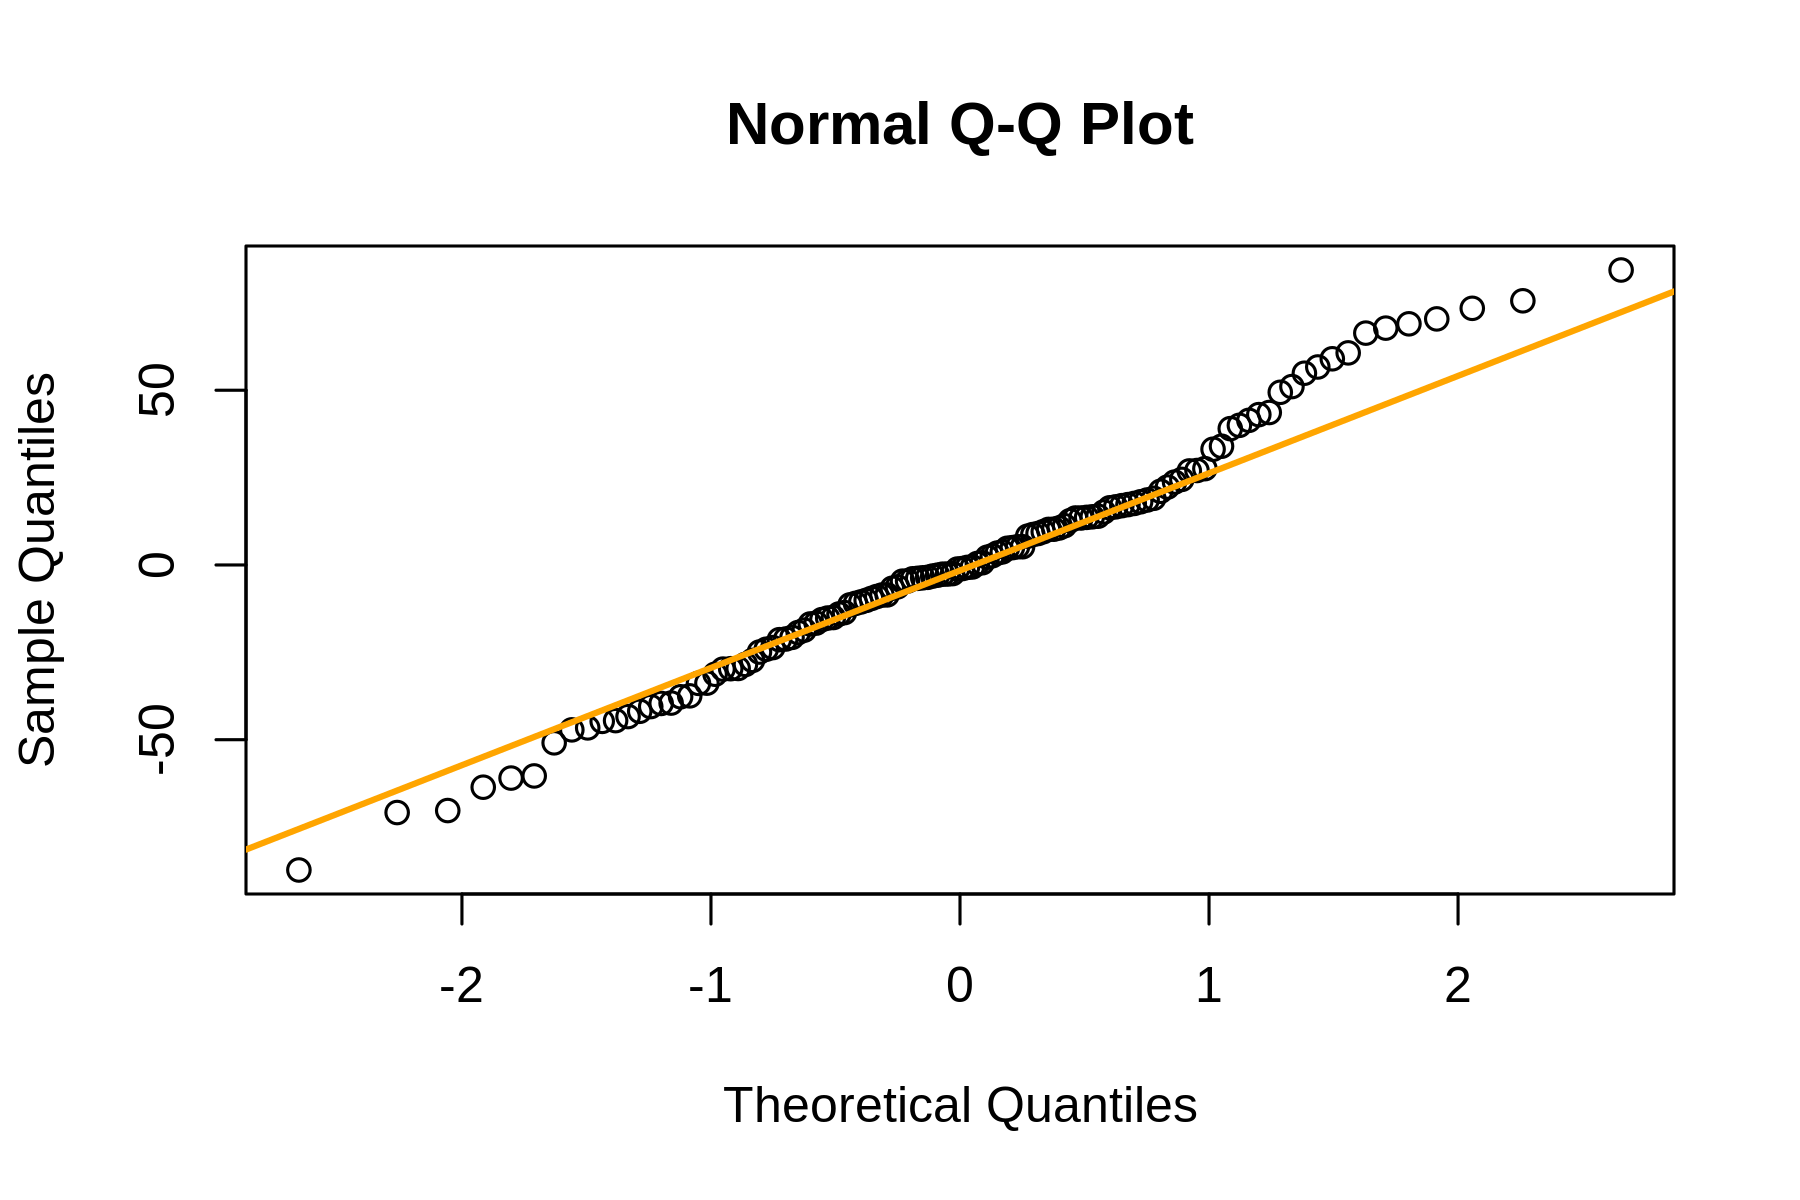

In [169]:
qqnorm(df_madrid.train$Square.Meters-predict_train_meters)
qqline(df_madrid.train$Square.Meters-predict_train_meters ,col = 'orange', lwd =2)


Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [170]:
metros_apt<-predict(modelo_metros.train, data.frame(Accommodates = 6, Bathrooms = 1, Price = 80, Bedrooms = 3, Beds = 3,  Review.Scores.Rating = 80, Guests.Included = 3))

print(paste('El apartamento mide', metros_apt, 'metros cuadrados aproximadamente'))


[1] "El apartamento mide 78.8590884791592 metros cuadrados aproximadamente"


In [171]:
summary(modelo_metros.train)


Call:
glm(formula = Square.Meters ~ Bathrooms + Bedrooms + Beds + Price + 
    Accommodates + Guests.Included, data = df_madrid.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-39.989  -10.633   -2.459    8.694   55.895  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     15.32967    4.36042   3.516 0.000625 ***
Bathrooms       17.21907    4.17635   4.123 7.02e-05 ***
Bedrooms        12.43847    2.81675   4.416 2.26e-05 ***
Beds             0.26631    1.86997   0.142 0.886998    
Price            0.02801    0.02353   1.191 0.236199    
Accommodates     2.83495    1.62285   1.747 0.083279 .  
Guests.Included -3.68487    1.78024  -2.070 0.040666 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 274.018)

    Null deviance: 82739  on 123  degrees of freedom
Residual deviance: 32060  on 117  degrees of freedom
  (3356 observations deleted due to missi

In [172]:
#Varia en 12 metros cuadrados de media por cada habitación adiccional

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [173]:
length(prediccion$Square.Meters)
table(is.na(df_madrid$Square.Meters))
table(is.na(prediccion$Square.Meters))

[1] 4971


FALSE  TRUE 
  186  4785 


FALSE  TRUE 
 4942    29 

In [174]:

prediccion <- predict(modelo_metros.train, df_madrid)
prediccion<- data.frame(Square.Meters = prediccion)


In [175]:
index2<-c(which(is.na(df_madrid$Square.Meters)))
df_madrid$Square.Meters[index2]<-prediccion$Square.Meters[index2]
head(df_madrid, 5)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Embajadores,2,1,1,2,50,1,20,93,40.41126,-3.697305,48.90544,1
2,Embajadores,5,1,2,4,95,4,0,97,40.41256,-3.701155,60.58728,1
3,La Latina,4,1,1,2,69,2,18,91,40.40791,-3.705095,51.42268,1
4,Embajadores,4,1,1,2,57,2,8,98,40.41162,-3.703281,51.08654,1
5,La Latina,2,1,1,1,59,1,0,95,40.40734,-3.707019,48.89123,1


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [176]:
library(Rcpp)


In [177]:
data_five_similar<-df_madrid[ , c('Bedrooms','Accommodates','Bathrooms','Beds' ,'Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]

In [178]:
piso_prueba <- data.frame(Bedrooms=3, Accommodates = 2,  Bathrooms = 2, Beds=3, Price=70, Guests.Included = 1, Extra.People= 3, Review.Scores.Rating = 91, Latitude = 40.41126, Longitude = 3.697305, Square.Meters=60.58728)


In [179]:
pr_train<-round(length(data_five_similar$Bedrooms) * 0.70)
indx<- 1:pr_train


pr_madrid.train<-data_five_similar[indx,]
pr_madrid.test<-data_five_similar[-indx,]

matrix_train<-data.matrix(pr_madrid.train)

In [180]:
matrix_na<-na.omit(matrix_train)


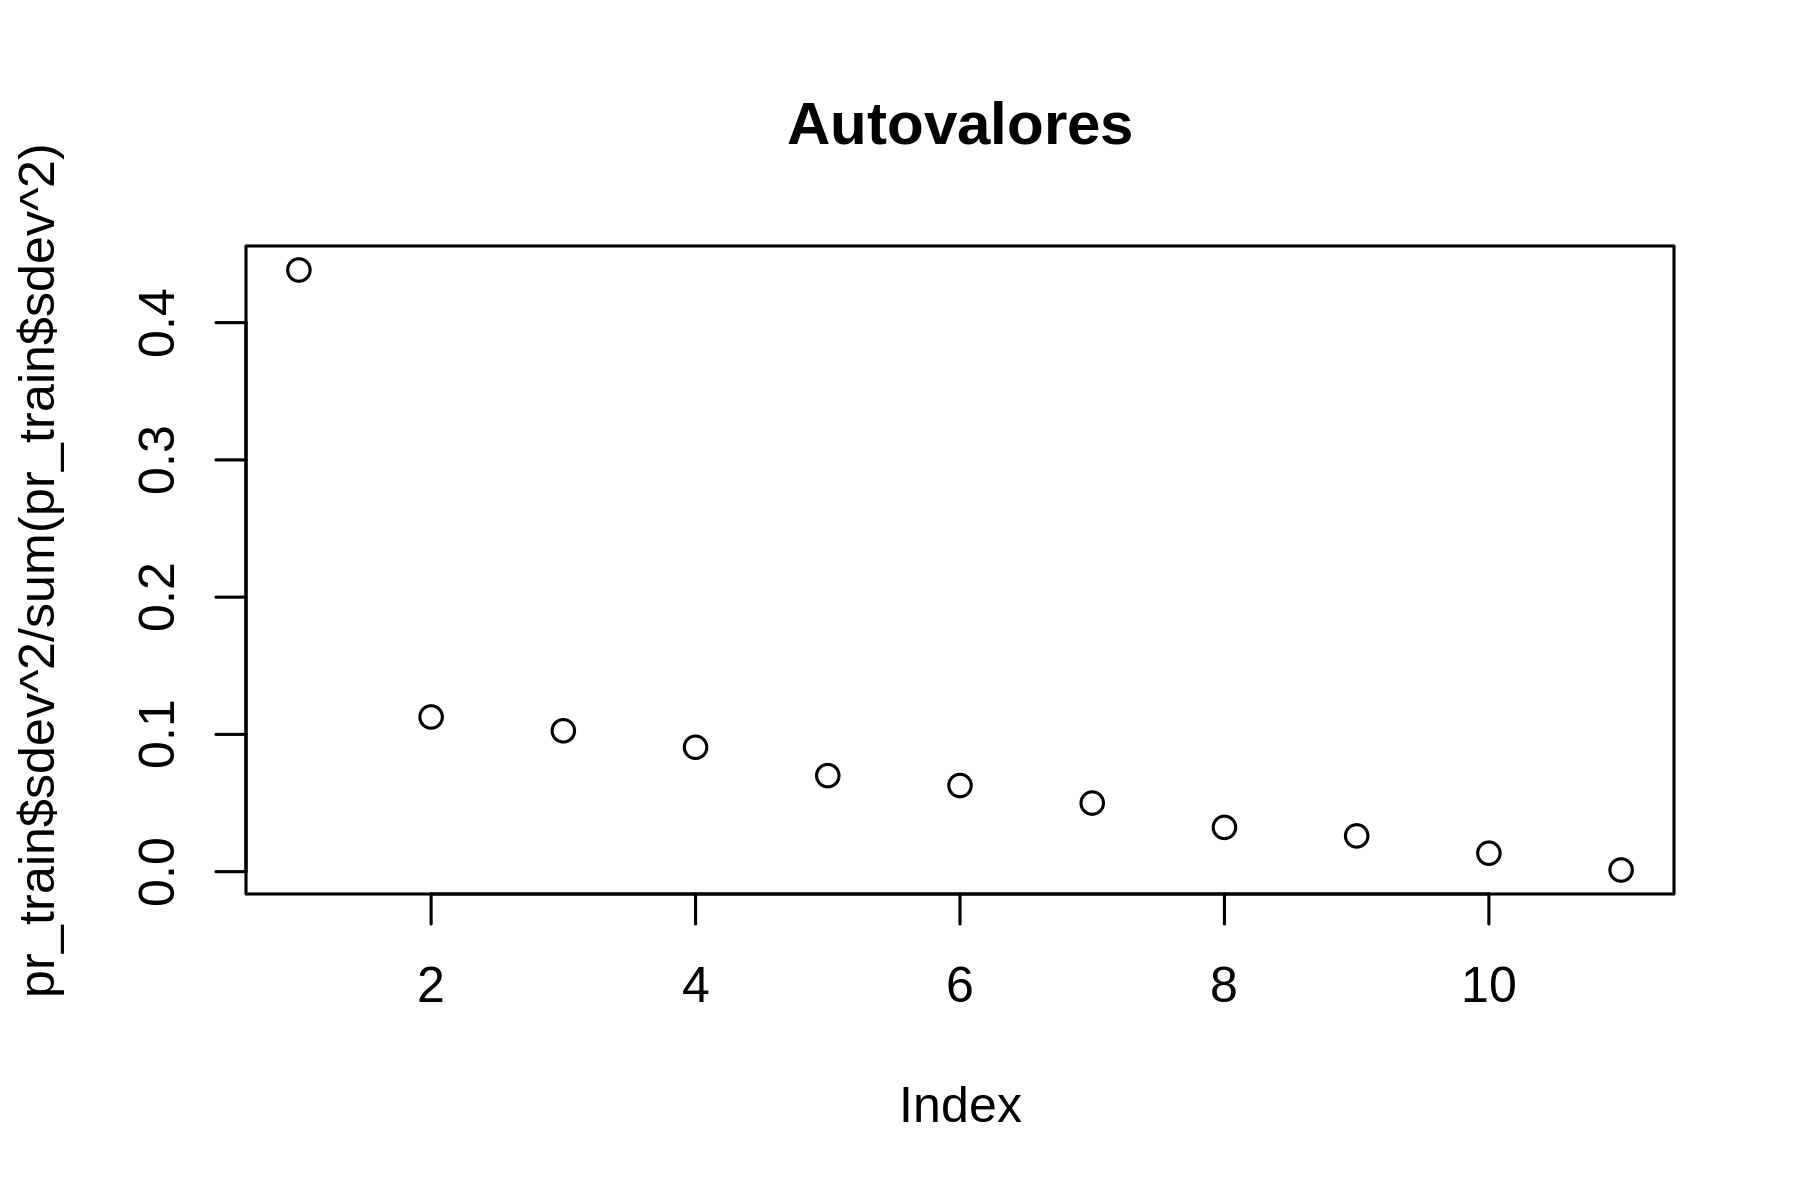

In [181]:
pr_train<- prcomp(matrix_na, center = TRUE, scale. = TRUE)
plot(pr_train$sdev^2/sum(pr_train$sdev^2),main="Autovalores")

In [189]:
cinco_similares<-function(data, piso, componentes){
    
    data_train_rows<- round(nrow(data)*0.7)
    indx<-1:data_train_rows
    data_train<-data[indx,]
    
    matrix_data_train<-data.matrix(data_train)
    matrix_data_train<-na.omit(matrix_data_train)
    pr_matrix_train<- prcomp(matrix_data_train, center = TRUE, scale. = TRUE)
    APC<-pr_matrix_train$x[ ,1:componentes]
    
    piso_tr<-predict(pr_matrix_train, piso)
    piso_tr<-piso_tr[,1:componentes]
    
    dist<-c()
    for (i in 1:nrow(APC)){
        dist[i]<- sum((piso_tr - APC[i,])^2)
        }
    return (data[head(order(dist), 5),])
}

In [193]:
cinco_similares(data_five_similar,piso_prueba, 2 )

,Bedrooms,Accommodates,Bathrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2671,1,3,1,1,59,1,0,96,40.40743,-3.697194,51.72618
303,1,2,1,1,59,1,0,87,40.38506,-3.732783,48.89123
154,1,2,1,1,52,1,0,94,40.41339,-3.698993,48.69515
1906,0,4,1,2,75,3,10,89,40.41166,-3.675520,35.46741
2962,1,4,1,4,78,2,18,97,40.41467,-3.706430,52.20740


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?